# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# **Load Data**

In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

Saving supermarket_sales - Sheet1.csv to supermarket_sales - Sheet1.csv


# **Data Exploration**

In [ ]:
print("Dataset Preview:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

Dataset Preview:
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415

# **Data Cleaning**

In [ ]:
columns_to_round = ['Tax 5%', 'Total', 'gross margin percentage', 'gross income']
data[columns_to_round] = data[columns_to_round].round(2)
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Invoice ID'] = data['Invoice ID'].str.replace('-', '', regex=False)
data['Product ID'] = [np.random.randint(1000000000, 10000000000) for _ in range(len(data))]

# **Feature Selection and Splitting Data**

In [ ]:
X = data[['Unit price', 'Quantity', 'Tax 5%']]
y = data['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Training**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# **Evaluation**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Model Evaluation:
Mean Squared Error (MSE): 0.003461214940049873
Mean Absolute Error (MAE): 0.04926739552202712
R^2 Score: 0.9999999467988163


# **Distribution of Predicted Sales**

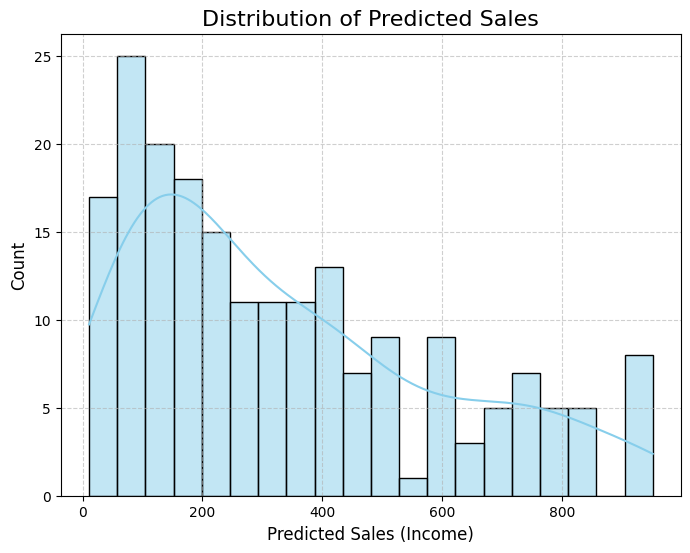

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title("Distribution of Predicted Sales", fontsize=16)
plt.xlabel("Predicted Sales (Income)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **Actual vs Predicted Sales Scatterplot**

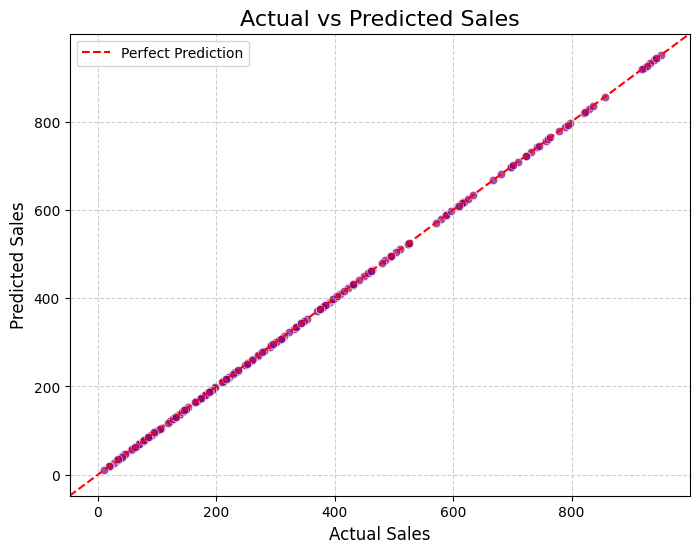

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', alpha=0.7)
plt.title("Actual vs Predicted Sales", fontsize=16)
plt.xlabel("Actual Sales", fontsize=12)
plt.ylabel("Predicted Sales", fontsize=12)
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **City Wise Sales Timeline**

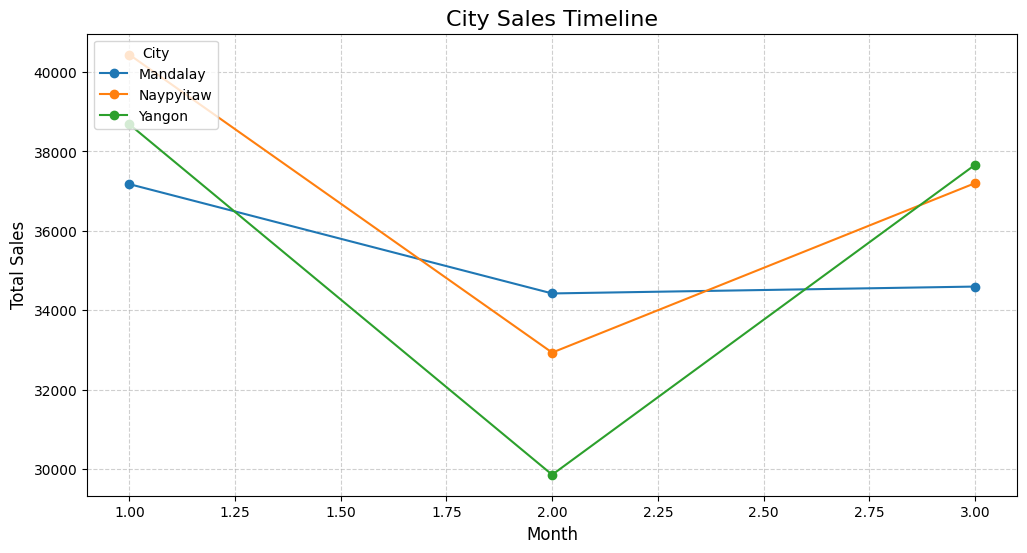

In [ ]:
pivot_data = data.pivot_table(index='Month', columns='City', values='Total', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 6))
for city in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[city], marker='o', label=city)
plt.title('City Sales Timeline', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='City', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **Product Line Analysis**

<ipython-input-12-c93977363a3e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_analysis, x='Product line', y='Quantity', ax=ax1, palette='viridis', width=0.6)
<ipython-input-12-c93977363a3e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_analysis, x='Product line', y='gross income', ax=ax2, palette='coolwarm', width=0.6)
<ipython-input-12-c93977363a3e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_analysis, x='Product line', y='Income per Unit', ax=ax3, palette='plasma', width=0.6)


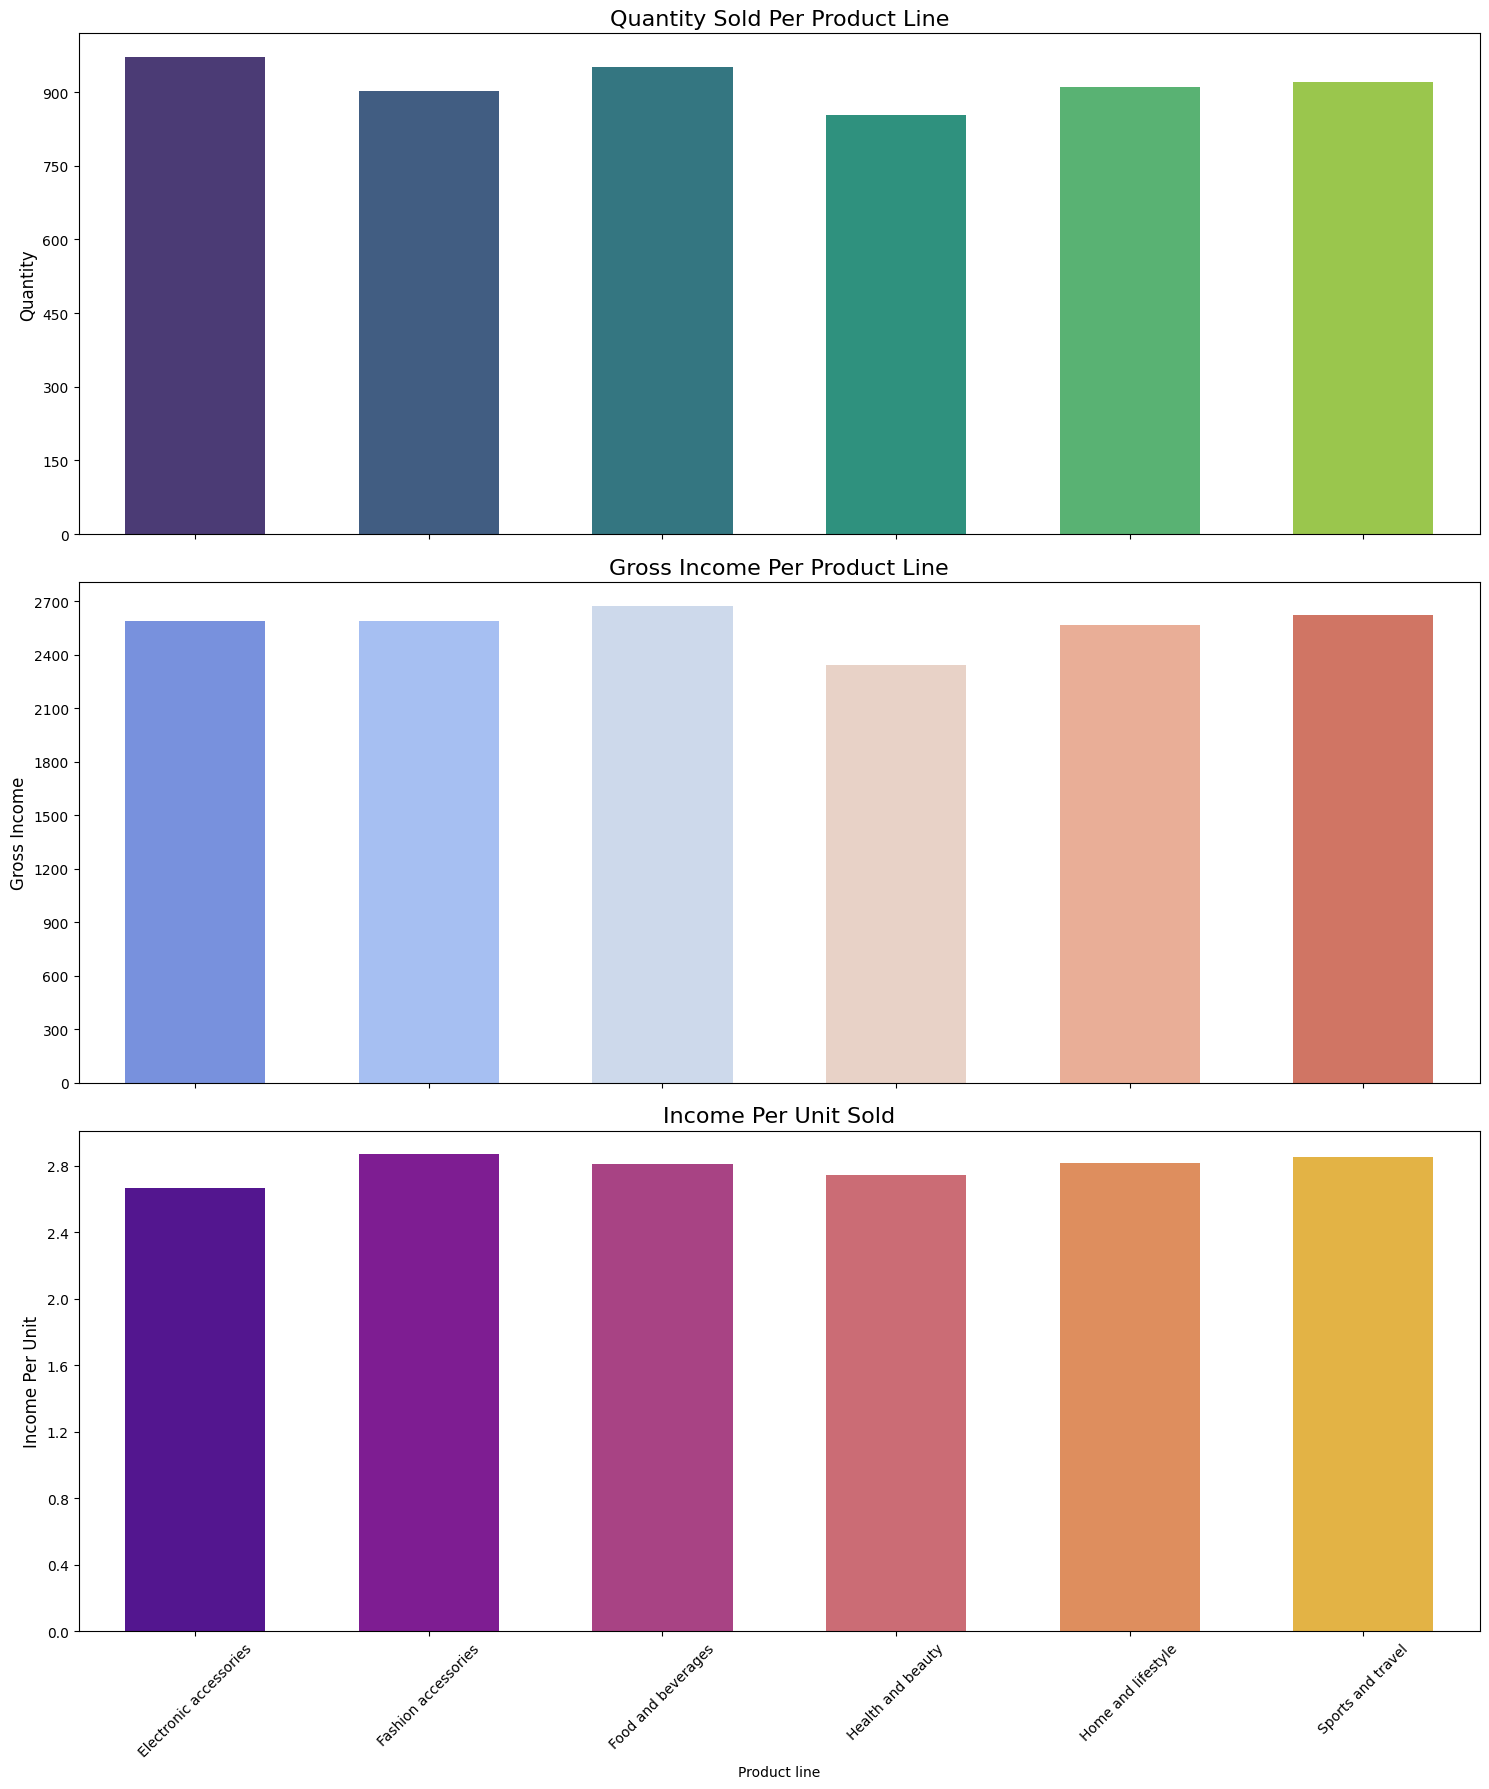

In [ ]:
quantity_per_product = data.groupby('Product line')['Quantity'].sum().reset_index()
income_per_product = data.groupby('Product line')['gross income'].sum().reset_index()
product_analysis = pd.merge(quantity_per_product, income_per_product, on='Product line')
product_analysis['Income per Unit'] = product_analysis['gross income'] / product_analysis['Quantity']

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 18), sharex=True)
sns.barplot(data=product_analysis, x='Product line', y='Quantity', ax=ax1, palette='viridis', width=0.6)
ax1.set_title("Quantity Sold Per Product Line", fontsize=16)
ax1.set_ylabel("Quantity", fontsize=12)
ax1.yaxis.set_major_locator(plt.MaxNLocator(10))

sns.barplot(data=product_analysis, x='Product line', y='gross income', ax=ax2, palette='coolwarm', width=0.6)
ax2.set_title("Gross Income Per Product Line", fontsize=16)
ax2.set_ylabel("Gross Income", fontsize=12)
ax2.yaxis.set_major_locator(plt.MaxNLocator(10))

sns.barplot(data=product_analysis, x='Product line', y='Income per Unit', ax=ax3, palette='plasma', width=0.6)
ax3.set_title("Income Per Unit Sold", fontsize=16)
ax3.set_ylabel("Income Per Unit", fontsize=12)
ax3.yaxis.set_major_locator(plt.MaxNLocator(10))

plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()
